In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [23]:
transcription_path = "../data/processed/"
filename="audio_transcription-Apr_25-17h_16m.csv"

df = pd.read_csv(transcription_path+filename)  # Ensure this CSV has: filename, transcription, emotion
print("📄 Total rows:", len(df))
print("📌 Sample:\n", df.head())

📄 Total rows: 600
📌 Sample:
                    filename                 transcription
0  03-01-01-01-01-01-01.wav  kids are talking by the door
1  03-01-01-01-01-01-02.wav  kids are talking by the door
2  03-01-01-01-01-01-03.wav  kids are talking by the door
3  03-01-01-01-01-01-04.wav  kids are talking by the door
4  03-01-01-01-01-01-05.wav  kids are talking by the door


In [24]:
unique_df = df.drop_duplicates(subset=["transcription"])
texts = unique_df["transcription"].values
print(f"🧹 Unique transcriptions: {len(texts)}")

🧹 Unique transcriptions: 15


In [25]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(texts)
print("✅ Vectorized shape:", X.shape)

✅ Vectorized shape: (15, 7)


In [26]:
k = 3  # Adjust as you experiment
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
unique_df["cluster"] = kmeans.labels_

C:\Users\Dama\AppData\Local\Temp\ipykernel_11788\2228856486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df["cluster"] = kmeans.labels_


In [27]:
unique_df

,filename,transcription,cluster
0,03-01-01-01-01-01-01.wav,kids are talking by the door,1
20,03-01-01-01-02-01-01.wav,dogs are sitting by the door,0
182,03-01-03-02-02-01-03.wav,are dogs are sitting by the door,0
195,03-01-03-02-02-02-20.wav,[Unintelligible],2
269,03-01-04-02-02-01-24.wav,is dogs are sitting by the door,0
275,03-01-04-02-02-02-20.wav,do dogs are sitting by the door,0
295,03-01-05-01-01-02-20.wav,my kids are talking by the door,1
333,03-01-05-02-01-02-04.wav,kids are talking about the door,1
345,03-01-05-02-02-01-20.wav,the dogs are sitting by the door,0
372,03-01-06-01-01-02-03.wav,the kids are talking by the door,1


In [28]:
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X.toarray())

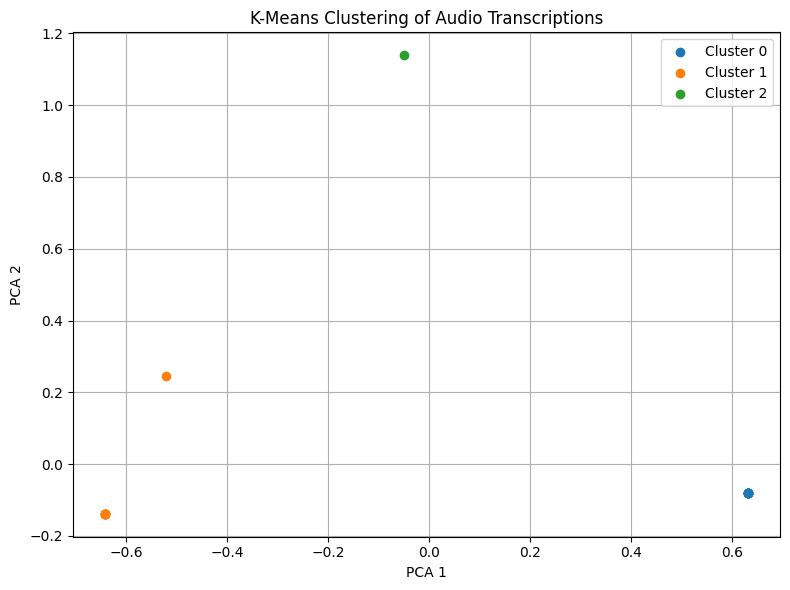

In [29]:
plt.figure(figsize=(8,6))
for i in range(k):
    points = reduced[unique_df['cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")
plt.title("K-Means Clustering of Audio Transcriptions")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("\nExample sentences by cluster:")
for i in range(k):
    print(f"\n--- Cluster {i} ---")
    print(unique_df[unique_df["cluster"] == i]["transcription"].sample(random_state=42).tolist())


🧾 Example sentences by cluster:

--- Cluster 0 ---
['dogs are sitting by the door']

--- Cluster 1 ---
['kids are talking by the door']

--- Cluster 2 ---
['[Unintelligible]']
